In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from category_encoders.leave_one_out import LeaveOneOutEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report
from lightgbm import LGBMClassifier
options(warn = -1)

In [7]:
data = pd.read_csv('data.csv')
data['verification_result'] = data['verification_result'].astype(int)
data.head()

,process.b1.capacity,process.b2.capacity,process.b3.capacity,process.b4.capacity,property.price,property.product,property.winner,verification_result,verification.time
0,0,0,2,1,59,1,0,0,163.316667
1,0,0,2,1,59,2,0,0,200.860000
2,0,0,2,1,59,4,0,0,154.888889
3,0,0,2,1,59,6,0,0,108.640000
4,0,0,2,1,60,1,0,1,85.466667


In [8]:
scaler = MinMaxScaler()
data_sc = scaler.fit_transform(data.drop(columns=['verification_result']))
X_train, X_test, y_train, y_test = train_test_split(data_sc, data.verification_result, train_size=.66, random_state=17, shuffle=True)

In [10]:
clf = LGBMClassifier(random_state=42).fit(X_train,y_train)
cv_sc = cross_val_score(clf, X_train, y_train, cv=4)
print(f"Cross-Validation Scores: {cv_sc}")



[LightGBM] [Info] Number of positive: 169, number of negative: 1179
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000076 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 309
[LightGBM] [Info] Number of data points in the train set: 1348, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.125371 -> initscore=-1.942523
[LightGBM] [Info] Start training from score -1.942523
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

**На крос валідації все збалансовано**

In [11]:
clf.fit(X_train, y_train)

print(f'Train Score: {clf.score(X_train, y_train)}')
print(f'Test Score: {clf.score(X_test, y_test)}')

[LightGBM] [Info] Number of positive: 169, number of negative: 1179
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000108 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 309
[LightGBM] [Info] Number of data points in the train set: 1348, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.125371 -> initscore=-1.942523
[LightGBM] [Info] Start training from score -1.942523
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

**Не перетренована модель**

In [12]:
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred, target_names=[f'class_{i}' for i in range(2)]))

              precision    recall  f1-score   support

     class_0       1.00      1.00      1.00       602
     class_1       1.00      0.97      0.98        93

    accuracy                           1.00       695
   macro avg       1.00      0.98      0.99       695
weighted avg       1.00      1.00      1.00       695



**Натренована гарно, метрики високі**

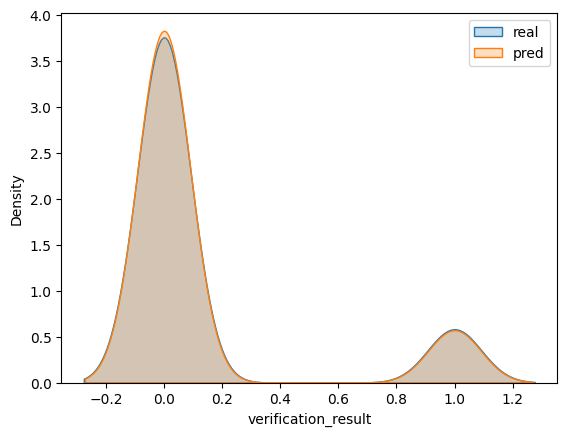

In [13]:
sns.kdeplot(y_test, fill=True, label='real')
sns.kdeplot(clf.predict(X_test), fill=True, label='pred')
plt.legend()